# Eigenfaces and PCA

In this notebook, we demonstrate application of PCA on the dataset of face images. We will visualize different principal components and also recover the images from the principal components.

In [1]:
# Import needed libraries
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import (datasets, decomposition)

We load olivetti faces dataset from sklearn datasets

In [2]:
olivetti_faces = datasets.fetch_olivetti_faces()
X = olivetti_faces.data
image_shape = (64, 64)

Now we define a helper function to display images in a grid

In [3]:
def display_grid_of_images(images, grid_shape, cmap='gray', size_scale=2, show=True):
    fig, axes = plt.subplots(*grid_shape, figsize=grid_shape)  
    fig.set_figheight(grid_shape[0] * size_scale)
    fig.set_figwidth(grid_shape[1] * size_scale)
    for i, ax in enumerate(axes.ravel()):
        im = ax.imshow(images[i].reshape(image_shape), cmap=cmap)
        ax.axis('off')
    if show:
        plt.show()
    else:
        return fig, axes, im

Let us first have a look at images in our dataset. The images are of size 64 to 64, so they contain 4096 pixels. The images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All photos were taken with subjects against a dark background, facing forward  (with tolerance for some side movement). 

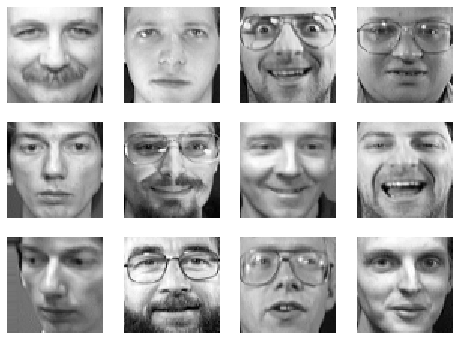

In [4]:
indices = np.random.choice(len(X), 12, replace=False)
display_grid_of_images(X[indices], (3, 4))   

We compute sample mean of the dataset by averaging the pixels of all images and display it.

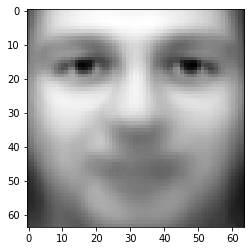

In [5]:
mean_face = X.mean(axis=0)
plt.imshow(mean_face.reshape(image_shape), cmap='gray')
plt.show()

We are now ready to perform PCA and visualize first 15 principal components. Please note that principal component is not an image in a classical sense since each pixel corresponds to some value that can be positive or negative (or zero). For this reason, we use colorful colormap instead of black and white to differentiate between values of different sign. Here red corresponds to positive values, and blue to negative.

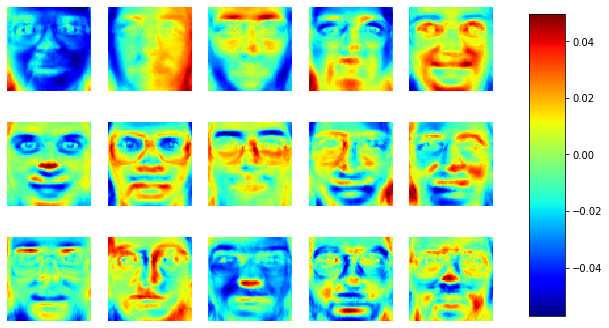

In [6]:
pca = decomposition.PCA(whiten=True)
pca.fit(X)
fig, axes, im = display_grid_of_images(pca.components_[:15], (3, 5), cmap='jet', show=False)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

Another way to visualize the principal components is to add (or substract) the component to the 'mean' face. We can see how different components capture different properties of a person or a photo: e.g. age or lighting. The middle column represents the starting point, images on the left and on the right correspond to taking steps along the principal component with different coefficient (negative on the left and positive on the right). 

Component 1


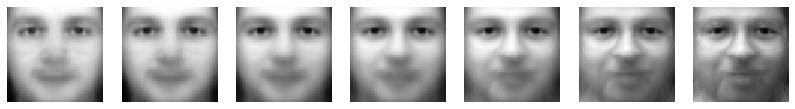

Component 2


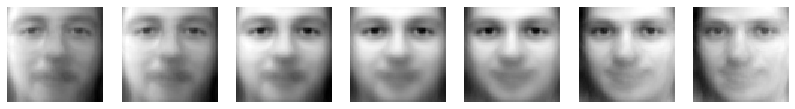

Component 3


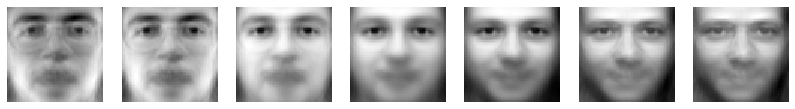

Component 4


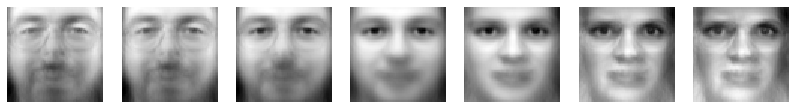

Component 5


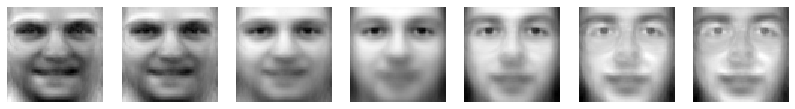

In [7]:
for i in range(5):   
    modified_faces = [mean_face + alpha * pca.components_[i] for alpha in [-10, -7, -3, 0, 3, 7, 10]]
    print(f"Component {i+1}")
    display_grid_of_images(modified_faces, (1, 7))    

Now we can use principal components to recover faces using the 'mean' face and principal components. Here we use different number of components and can observe how the quality improves once we have enough components to capture the main properties of the face. On the contrary, when we use only 5 principal components all faces look roughly the same. 

Original images


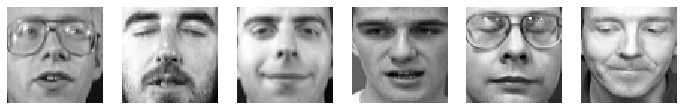

Number of principal components 5


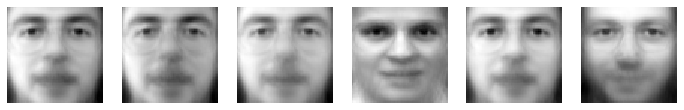

Number of principal components 50


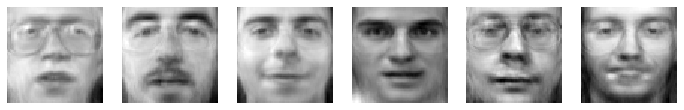

Number of principal components 100


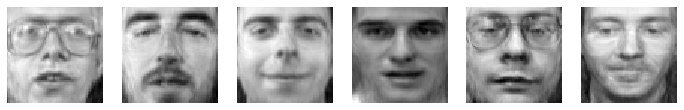

In [8]:
indices = np.random.choice(len(X), 6, replace=False)
original_faces = X[indices]
print('Original images')
display_grid_of_images(original_faces, (1, 6)) 

for num_comp in [5, 50, 100]:
    pca = decomposition.PCA(n_components=num_comp, whiten=True)
    pca.fit(X)
    recovered_faces = pca.inverse_transform(pca.transform(original_faces))
    
    # Display recovered images
    print(f"Number of principal components {num_comp}")
    display_grid_of_images(recovered_faces, (1, 6)) 

We can also estimate the quality by looking at eigenvalues of covariance matrix. Here in scikit-learn implementation of PCA, we have an access to singular values so we can plot their squares. Can you explain why does it correspond to quality of the recovery procedure as in the previous cell? 

*Remark*: there is also option of accessing explained variance with ```pca.explained_variance_```, how does it related to eigenvalues? You can plot ```pca.explained_variance_``` separately and compare with the plot for singular values.  

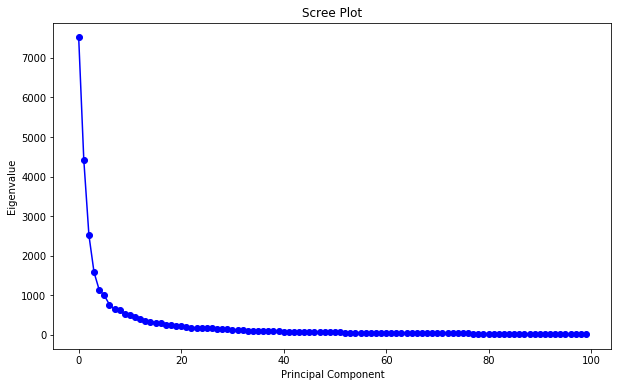

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(pca.singular_values_ ** 2, marker='o', linestyle='-', color='b')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

This concludes this notebook with experiments with PCA on olivetti dataset from my side, but feel free to experiment more! For example you can use PCA components to visualize the dataset in two dimensions. How would you perform such an experiment? 